# Standardisasi

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('standardisasi.xlsx', skiprows=1, header=1).iloc[:10]
df = df[['TB(m)','BB(kg)']]
df

,TB(m),BB(kg)
0,0.8,20
1,0.85,25
2,0.92,21
3,0.88,29
4,0.82,30
5,0.86,21
6,0.87,28
7,0.93,27
8,0.81,29
9,1,30


<hr>

## Standardisasi Formula

Standardisasi $\displaystyle z = \frac {x - \bar{x}}{s} $
dengan nilai standard deviasi $ ddof = 0 $ yaitu $\displaystyle s = \sqrt { \frac {\sum (x- \bar{x}^2}{n-0}} $

- High Outlier jika $ z_{score} > 2.5 $
- Low Outlier jika $ z_{score} < -2.5 $
- Data terstandardisasi mean ~ 0 dan std ~ 1

In [7]:
# Standar Deviasi dari pandas .std() => ddof = 1 sama dengan excel
df['TB(m)'].std()

0.06186005711819757

In [8]:
# Standar Deviasi dari numpy np.std() => ddof = 0 secara default
np.std(df['TB(m)'])

0.05868560300448484

In [9]:
np.std(df['TB(m)'],ddof=1) # agar sama hasilnya dengan pandas, perlu ditambahkan ddof=1

0.06186005711819757

In [10]:
# Standardisasi z score with std from pandas
df['Z TB PD'] = (df['TB(m)'] - df['TB(m)'].mean()) / df['TB(m)'].std()
df['Z BB PD'] = (df['BB(kg)'] - df['BB(kg)'].mean()) / df['BB(kg)'].std()
df

,TB(m),BB(kg),Z TB PD,Z BB PD
0,0.8,20,-1.19625,-1.51053
1,0.85,25,-0.387972,-0.251754
2,0.92,21,0.743614,-1.25877
3,0.88,29,0.0969931,0.755263
4,0.82,30,-0.872938,1.00702
5,0.86,21,-0.226317,-1.25877
6,0.87,28,-0.0646621,0.503509
7,0.93,27,0.905269,0.251754
8,0.81,29,-1.03459,0.755263
9,1,30,2.03686,1.00702


In [11]:
# Standardisasi z score with np.std from numpy
df['Z TB NP'] = (df['TB(m)'] - df['TB(m)'].mean()) / np.std(df['TB(m)'])
df['Z BB NP'] = (df['BB(kg)'] - df['BB(kg)'].mean()) / np.std(df['BB(kg)'])
df

,TB(m),BB(kg),Z TB PD,Z BB PD,Z TB NP,Z BB NP
0,0.8,20,-1.19625,-1.51053,-1.26096,-1.59223
1,0.85,25,-0.387972,-0.251754,-0.408959,-0.265372
2,0.92,21,0.743614,-1.25877,0.783838,-1.32686
3,0.88,29,0.0969931,0.755263,0.10224,0.796117
4,0.82,30,-0.872938,1.00702,-0.920158,1.06149
5,0.86,21,-0.226317,-1.25877,-0.238559,-1.32686
6,0.87,28,-0.0646621,0.503509,-0.0681598,0.530745
7,0.93,27,0.905269,0.251754,0.954237,0.265372
8,0.81,29,-1.03459,0.755263,-1.09056,0.796117
9,1,30,2.03686,1.00702,2.14703,1.06149


In [12]:
# Standardisasai mean ~ 0 dan std ~ 1
print(df['Z TB PD'].mean())
print(df['Z TB NP'].mean())
print(df['Z BB PD'].mean())
print(df['Z BB NP'].mean())

print(df['Z TB PD'].std())
print(df['Z TB NP'].std())
print(df['Z BB PD'].std())
print(df['Z BB NP'].std())

1.7763568394002506e-16
1.3322676295501878e-16
-8.881784197001253e-17
0.0
1.0000000000000002
1.0540925533894598
1.0
1.0540925533894598


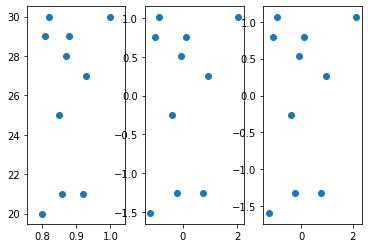

In [13]:
plt.subplot(131)
plt.scatter(df['TB(m)'], df['BB(kg)'])
plt.subplot(132)
plt.scatter(df['Z TB PD'], df['Z BB PD'])
plt.subplot(133)
plt.scatter(df['Z TB NP'], df['Z BB NP'])

<hr>

# Standardisasi menurut SKLEARN

In [23]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaler.fit(df[['TB(m)', 'BB(kg)']])
z = scaler.transform(df[['TB(m)', 'BB(kg)']])
z

array([[-1.26095663, -1.59223468],
       [-0.40895891, -0.26537245],
       [ 0.7838379 , -1.32686223],
       [ 0.10223973,  0.79611734],
       [-0.92015754,  1.06148978],
       [-0.23855936, -1.32686223],
       [-0.06815982,  0.53074489],
       [ 0.95423745,  0.26537245],
       [-1.09055708,  0.79611734],
       [ 2.14703426,  1.06148978]])

In [27]:
df['Z TB SKL'] = z[:,0]
df['Z BB SKL'] = z[:,1]
df

,TB(m),BB(kg),Z TB PD,Z BB PD,Z TB NP,Z BB NP,Z TB SKL,Z BB SKL
0,0.8,20,-1.19625,-1.51053,-1.26096,-1.59223,-1.260957,-1.592235
1,0.85,25,-0.387972,-0.251754,-0.408959,-0.265372,-0.408959,-0.265372
2,0.92,21,0.743614,-1.25877,0.783838,-1.32686,0.783838,-1.326862
3,0.88,29,0.0969931,0.755263,0.10224,0.796117,0.102240,0.796117
4,0.82,30,-0.872938,1.00702,-0.920158,1.06149,-0.920158,1.061490
5,0.86,21,-0.226317,-1.25877,-0.238559,-1.32686,-0.238559,-1.326862
6,0.87,28,-0.0646621,0.503509,-0.0681598,0.530745,-0.068160,0.530745
7,0.93,27,0.905269,0.251754,0.954237,0.265372,0.954237,0.265372
8,0.81,29,-1.03459,0.755263,-1.09056,0.796117,-1.090557,0.796117
9,1,30,2.03686,1.00702,2.14703,1.06149,2.147034,1.061490


In [33]:
# inverse transform
inv = scaler.inverse_transform(df[['Z TB SKL', 'Z BB SKL']])
print(inv[:,0])
print(inv[:,1])

[0.8  0.85 0.92 0.88 0.82 0.86 0.87 0.93 0.81 1.  ]
[20. 25. 21. 29. 30. 21. 28. 27. 29. 30.]
